In [1]:
#Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 
import os
import seaborn as sns
path = r'C:\Users\14438\Downloads'
os.chdir(path)

In [2]:
#Importing the dataset
dataset = pd.read_csv('sea_ice_prediction_1980_2018.csv')
dataset

u10       v10         cc            msl    precip      GH_mean  \
0     -0.852707 -0.775285  86.847370  102414.766354  0.027216  5875.709046   
1     -0.287450 -0.443624  85.294144  102440.734660  0.035363  5872.287773   
2      0.451400  0.037015  85.590332  102203.207958  0.031765  5856.492587   
3      0.566829  0.133591  86.457462  102162.518758  0.028568  5848.457862   
4      0.594037 -0.313404  87.916390  102199.253070  0.041957  5864.863071   
...         ...       ...        ...            ...       ...          ...   
14240  1.634874  0.330422  80.562408  101607.199871  0.031296  5878.865633   
14241  1.748236  0.410111  82.489632  101612.621492  0.034856  5879.404049   
14242  2.062608  0.523759  81.004016  101411.783053  0.039194  5860.857646   
14243  1.636951  0.586348  82.970884  101116.184521  0.045516  5841.278345   
14244  1.520603  0.360501  79.841286  100877.906456  0.056061  5840.260371   

         RH_mean         cw        hf        sw        lw  sea_ice  
0      58.818205  30.842493 -0.993845  0.062849  7.635537   14.200  
1      59.695355  35.107226 -0.832535  0.065163  7.592175   14.200  
2      60.185368  35.026957 -0.661263  0.064655  7.589000   14.302  
3      59.676706  36.849451 -0.530227  0.067855  7.586559   14.302  
4      58.052838  47.449325 -0.587315  0.043990  7.736615   14.414  
...          ...        ...       ...       ...       ...      ...  
14240  52.900464  35.055577 -0.756241  0.046698  8.096162   12.272  
14241  53.143895  38.807659 -1.008978  0.049457  8.189719   12.325  
14242  53.641762  41.103872 -1.196975  0.052705  8.181905   12.344  
14243  53.157494  44.183084 -1.092911  0.060334  8.269319   12.523  
14244  52.534742  47.422992 -0.890332  0.051586  8.294684   12.569  

[14245 rows x 12 columns]

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 12 columns):
u10        14245 non-null float64
v10        14245 non-null float64
cc         14245 non-null float64
msl        14245 non-null float64
precip     14245 non-null float64
GH_mean    14245 non-null float64
RH_mean    14245 non-null float64
cw         14245 non-null float64
hf         14245 non-null float64
sw         14245 non-null float64
lw         14245 non-null float64
sea_ice    14245 non-null float64
dtypes: float64(12)
memory usage: 1.3 MB


In [4]:
dataset.shape


(14245, 12)

# Feature Engineering

In [5]:
dataset.dropna()

u10       v10         cc            msl    precip      GH_mean  \
0     -0.852707 -0.775285  86.847370  102414.766354  0.027216  5875.709046   
1     -0.287450 -0.443624  85.294144  102440.734660  0.035363  5872.287773   
2      0.451400  0.037015  85.590332  102203.207958  0.031765  5856.492587   
3      0.566829  0.133591  86.457462  102162.518758  0.028568  5848.457862   
4      0.594037 -0.313404  87.916390  102199.253070  0.041957  5864.863071   
...         ...       ...        ...            ...       ...          ...   
14240  1.634874  0.330422  80.562408  101607.199871  0.031296  5878.865633   
14241  1.748236  0.410111  82.489632  101612.621492  0.034856  5879.404049   
14242  2.062608  0.523759  81.004016  101411.783053  0.039194  5860.857646   
14243  1.636951  0.586348  82.970884  101116.184521  0.045516  5841.278345   
14244  1.520603  0.360501  79.841286  100877.906456  0.056061  5840.260371   

         RH_mean         cw        hf        sw        lw  sea_ice  
0      58.818205  30.842493 -0.993845  0.062849  7.635537   14.200  
1      59.695355  35.107226 -0.832535  0.065163  7.592175   14.200  
2      60.185368  35.026957 -0.661263  0.064655  7.589000   14.302  
3      59.676706  36.849451 -0.530227  0.067855  7.586559   14.302  
4      58.052838  47.449325 -0.587315  0.043990  7.736615   14.414  
...          ...        ...       ...       ...       ...      ...  
14240  52.900464  35.055577 -0.756241  0.046698  8.096162   12.272  
14241  53.143895  38.807659 -1.008978  0.049457  8.189719   12.325  
14242  53.641762  41.103872 -1.196975  0.052705  8.181905   12.344  
14243  53.157494  44.183084 -1.092911  0.060334  8.269319   12.523  
14244  52.534742  47.422992 -0.890332  0.051586  8.294684   12.569  

[14245 rows x 12 columns]

In [6]:
dataset.corr()

u10       v10        cc       msl    precip   GH_mean   RH_mean  \
u10      1.000000  0.903514  0.003289 -0.438737  0.156654 -0.098731  0.235561   
v10      0.903514  1.000000  0.089035 -0.446999  0.122859 -0.154198  0.288389   
cc       0.003289  0.089035  1.000000 -0.124086  0.014854 -0.550381  0.677079   
msl     -0.438737 -0.446999 -0.124086  1.000000 -0.475135  0.013393 -0.160481   
precip   0.156654  0.122859  0.014854 -0.475135  1.000000  0.506749 -0.085714   
GH_mean -0.098731 -0.154198 -0.550381  0.013393  0.506749  1.000000 -0.710435   
RH_mean  0.235561  0.288389  0.677079 -0.160481 -0.085714 -0.710435  1.000000   
cw       0.068402  0.030641 -0.222846 -0.321288  0.797938  0.854300 -0.395968   
hf       0.112074  0.194879  0.580184  0.122255 -0.396628 -0.799034  0.695081   
sw      -0.083543 -0.119569 -0.691449  0.033499  0.115168  0.750359 -0.818304   
lw       0.012359 -0.035857 -0.428473 -0.242582  0.645049  0.957187 -0.598438   
sea_ice -0.044475  0.005667  0.001842  0.301811 -0.722373 -0.609587  0.152875   

               cw        hf        sw        lw   sea_ice  
u10      0.068402  0.112074 -0.083543  0.012359 -0.044475  
v10      0.030641  0.194879 -0.119569 -0.035857  0.005667  
cc      -0.222846  0.580184 -0.691449 -0.428473  0.001842  
msl     -0.321288  0.122255  0.033499 -0.242582  0.301811  
precip   0.797938 -0.396628  0.115168  0.645049 -0.722373  
GH_mean  0.854300 -0.799034  0.750359  0.957187 -0.609587  
RH_mean -0.395968  0.695081 -0.818304 -0.598438  0.152875  
cw       1.000000 -0.630472  0.455490  0.930319 -0.788774  
hf      -0.630472  1.000000 -0.804320 -0.779372  0.336510  
sw       0.455490 -0.804320  1.000000  0.673548 -0.045565  
lw       0.930319 -0.779372  0.673548  1.000000 -0.729200  
sea_ice -0.788774  0.336510 -0.045565 -0.729200  1.000000

In [7]:
dataset.corr()[['sea_ice']].sort_values(by='sea_ice', ascending=False)

sea_ice
sea_ice  1.000000
hf       0.336510
msl      0.301811
RH_mean  0.152875
v10      0.005667
cc       0.001842
u10     -0.044475
sw      -0.045565
GH_mean -0.609587
precip  -0.722373
lw      -0.729200
cw      -0.788774

# Correlation Matrix with Heatmap

#Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

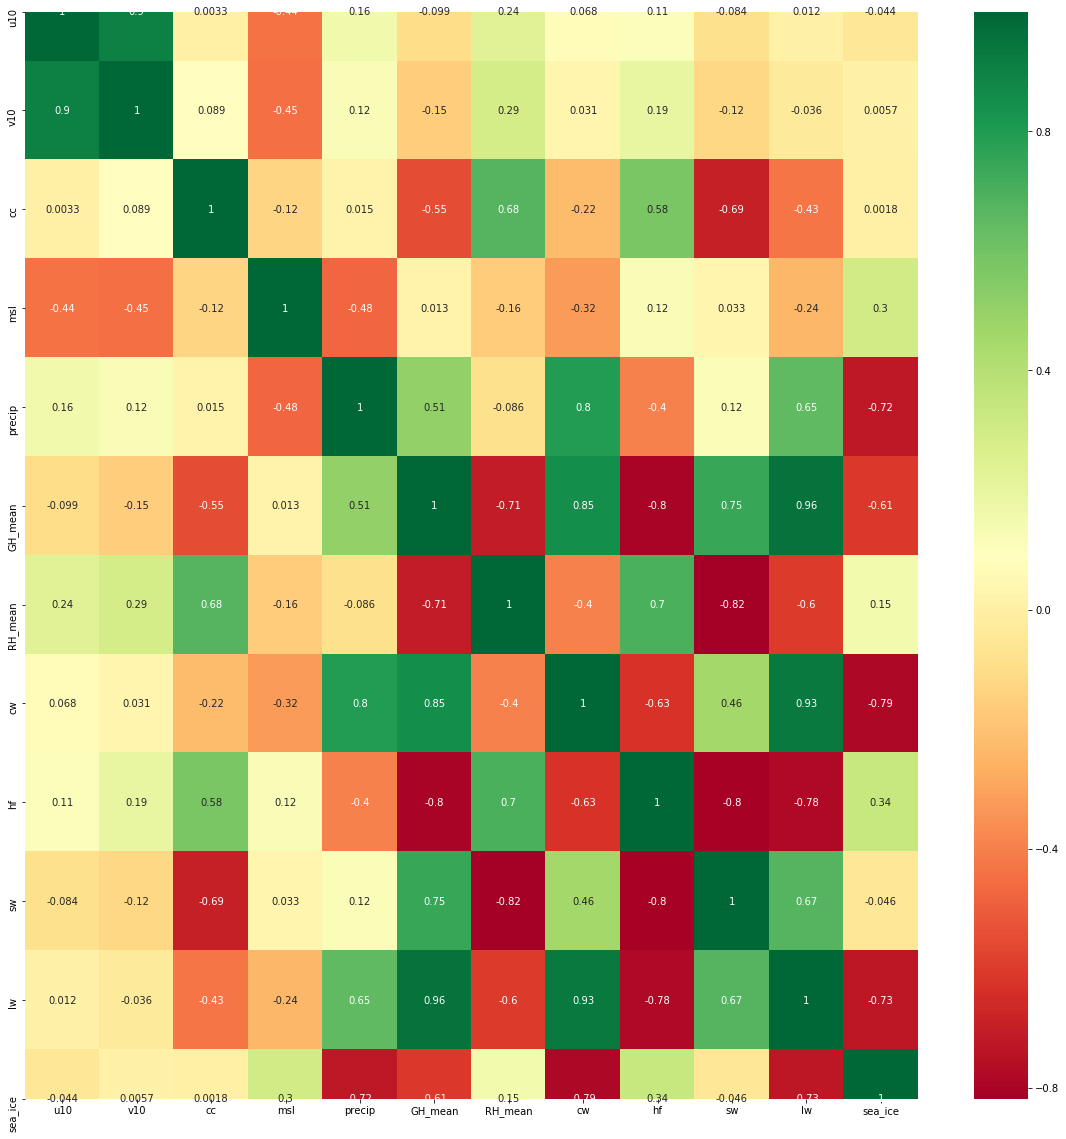

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

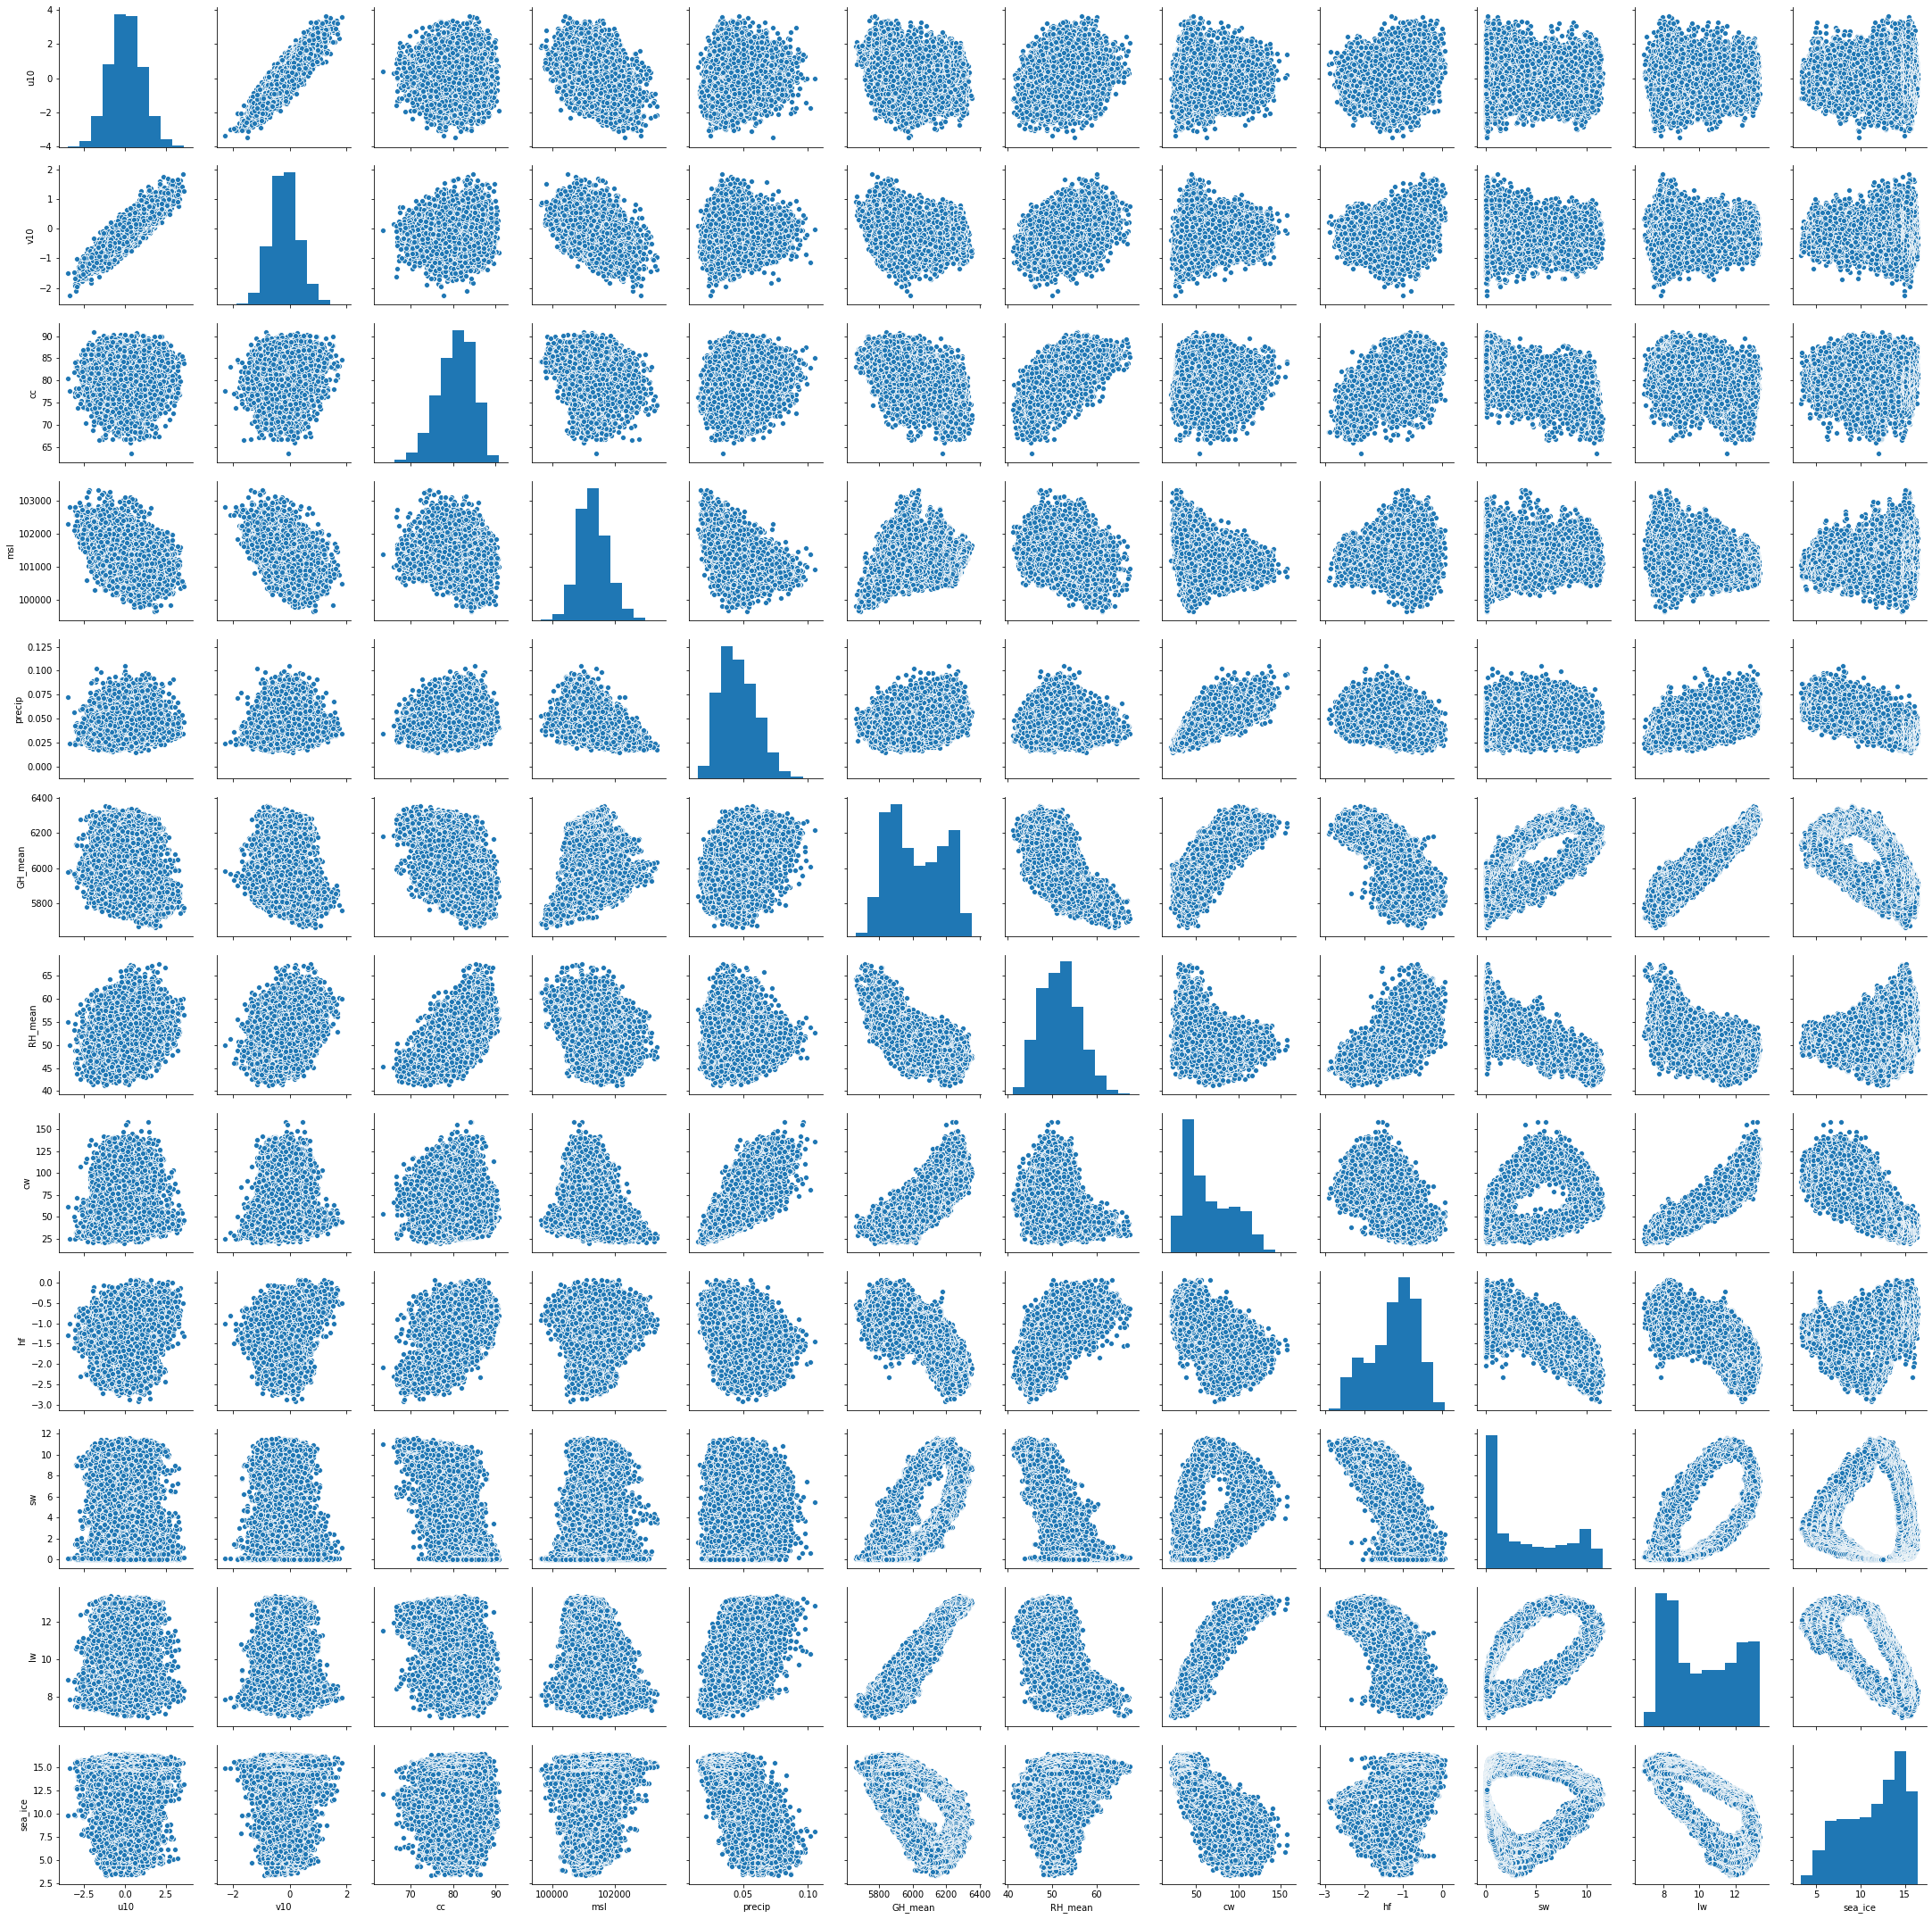

In [46]:
sns.pairplot(dataset)


In [10]:
feature_names=['u10','v10','cc','msl','precip','GH_mean','RH_mean','cw','hf','sw','lw']

# use the list to select a subset of the original DataFrame
X = dataset[feature_names]

# sales
y = dataset.sea_ice

In [11]:
corrmat.index

Index(['u10', 'v10', 'cc', 'msl', 'precip', 'GH_mean', 'RH_mean', 'cw', 'hf',
       'sw', 'lw', 'sea_ice'],
      dtype='object')

In [49]:
conda update scikit-learnn



Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Users\14438\Anaconda3
  package name: scikit-learnn




# Feature Importance

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\14438\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [13]:
X.head()


u10       v10         cc            msl    precip      GH_mean  \
0 -0.852707 -0.775285  86.847370  102414.766354  0.027216  5875.709046   
1 -0.287450 -0.443624  85.294144  102440.734660  0.035363  5872.287773   
2  0.451400  0.037015  85.590332  102203.207958  0.031765  5856.492587   
3  0.566829  0.133591  86.457462  102162.518758  0.028568  5848.457862   
4  0.594037 -0.313404  87.916390  102199.253070  0.041957  5864.863071   

     RH_mean         cw        hf        sw        lw  
0  58.818205  30.842493 -0.993845  0.062849  7.635537  
1  59.695355  35.107226 -0.832535  0.065163  7.592175  
2  60.185368  35.026957 -0.661263  0.064655  7.589000  
3  59.676706  36.849451 -0.530227  0.067855  7.586559  
4  58.052838  47.449325 -0.587315  0.043990  7.736615

In [14]:
print(model.feature_importances_)


[0.00326313 0.00343788 0.00801976 0.00399532 0.07309016 0.02079659
 0.00954011 0.372334   0.04955483 0.22172714 0.23424106]


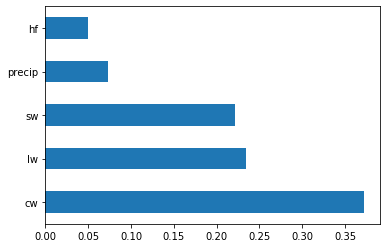

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#  Random Forest Regressor

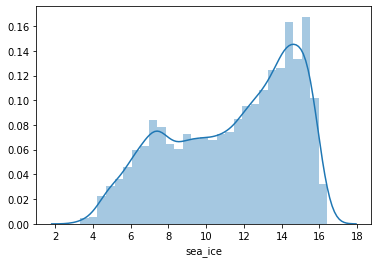

In [56]:
sns.distplot(y)


# Train Test Split

In [354]:
#importing library and train test split for random forest regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [355]:
from sklearn.ensemble import RandomForestRegressor


In [356]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

C:\Users\14438\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [357]:
#y_pred = model.predict(x_test)
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.9938407833670829


In [360]:
# R squared value calculation
print("Coefficient of determination R^2 <-- on t set: {}".format(regressor.score(X_test, y_test)))
r2_randomforest=regressor.score(X_test, y_test)

Coefficient of determination R^2 <-- on test set: 0.9666282435462131


In [61]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [266]:
#Mean value calculation
score.mean()


-3.652594136117753

# Model Evaluation

In [23]:
prediction_rfbt=regressor.predict(X_test)

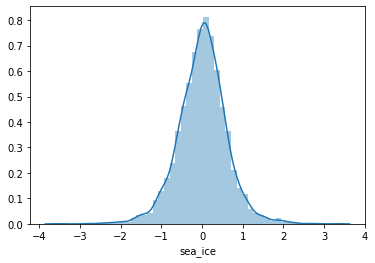

In [135]:
sns.distplot(y_test-prediction_rfbt)

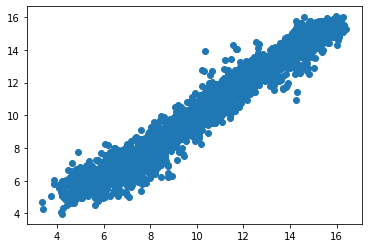

In [136]:
plt.scatter(y_test,prediction_rfbt)

# Hyperparameter Tuning¶


In [34]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [35]:
#performing wih random search CV
from sklearn.model_selection import RandomizedSearchCV


In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [37]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [38]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
rf = RandomForestRegressor()

In [39]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=  18.9s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 165.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [42]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [43]:
rf_random.best_score_

-0.3231092942303269

In [44]:
predictions_rfat_rcv=rf_random.predict(X_test)

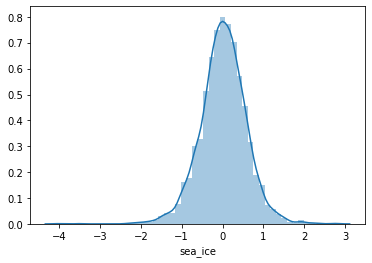

In [45]:
sns.distplot(y_test-predictions_rfat_rcv)

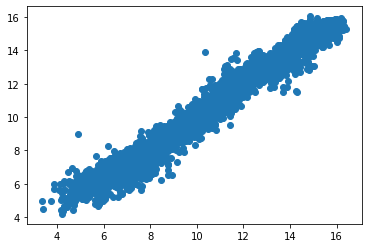

In [46]:
plt.scatter(y_test,predictions_rfat_rcv)

In [47]:
from sklearn import metrics

In [49]:
#metrics of random forest random search CV
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rfat_rcv))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rfat_rcv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rfat_rcv)))

MAE: 0.42847010391583423
MSE: 0.31756290924440683
RMSE: 0.5635272036418534


# Regression Evaluation Metrics


In [399]:
rf_bt_mae=metrics.mean_absolute_error(y_test, prediction_rfbt)
rf_bt_mse=metrics.mean_squared_error(y_test, prediction_rfbt)
rf_bt_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction_rfbt))

In [401]:
#metrics of random forest regressor before hyper parameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rfbt))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rfbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rfbt)))

MAE: 0.44827498830135704
MSE: 0.36198087813055685
RMSE: 0.6016484672386001


In [278]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.4487 degrees.
Accuracy = 95.22%.
Model Performance
Average Error: 0.4285 degrees.
Accuracy = 95.44%.
Improvement of 0.23%.


# Gridsearch CV

In [55]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search with cv=10 folds
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [21]:
# Fit the grid search to the data
grid_search.fit(X, y)
grid_search.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 62.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 86.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 111.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 127.1min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
#below cv=5 folds is used for hyper parameter tuning (grid search CV)

In [56]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search  with cv=5 folds used  in calculating metrics 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [57]:
# Fit the grid search to the data
grid_search.fit(X, y)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 61.1min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [58]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [60]:
# Fit the grid search to the data

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X, y)
######
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.2768 degrees.
Accuracy = 97.02%.
Improvement of 1.89%.


In [397]:
rf_atgcv_mae=metrics.mean_absolute_error(y_test, predictionss_rf_at_gv)
rf_atgcv_mse=metrics.mean_squared_error(y_test, predictionss_rf_at_gv)
rf_atgcv_rmse=np.sqrt(metrics.mean_squared_error(y_test, predictionss_rf_at_gv))

In [396]:
predictionss_rf_at_gv=grid_search.predict(X_test)

In [398]:
#metrics used for random forest regressor after hyper parameter tuning (grid search CV)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictionss_rf_at_gv))
print('MSE:', metrics.mean_squared_error(y_test, predictionss_rf_at_gv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionss_rf_at_gv)))

MAE: 0.2767039163294703
MSE: 0.12884617134821752
RMSE: 0.35895148885081607


# Decision Tree Regressor

In [284]:
#library imported and train test split for decision tree regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [285]:

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [286]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 1.0


In [362]:
# r squared value calculation
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))
r2_decisiontree=dtree.score(X_test, y_test)

Coefficient of determination R^2 <-- on test set: 0.9372920881629343


##OVERFIT MODEL

In [288]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [290]:
#Mean calculation
score.mean()


0.8992232395874646

MODEL EVALUATION


In [291]:
prediction_dt_bt=dtree.predict(X_test)


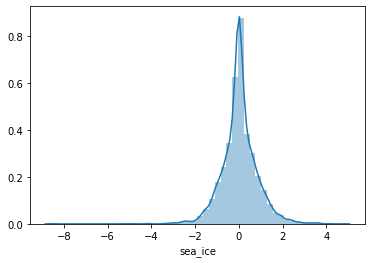

In [80]:
sns.distplot(y_test-prediction_dt_bt)


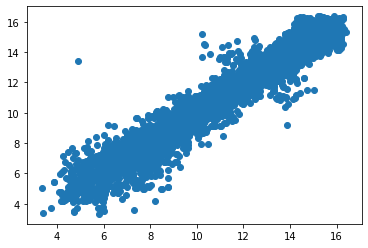

In [81]:
plt.scatter(y_test,prediction_dt_bt)


Hyperparameter Tuning Decision Tree Regressor


In [82]:
DecisionTreeRegressor()


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [83]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [84]:

## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)


In [86]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [87]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 447 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 1809 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 3153 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 4881 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 8985 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11987 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 14508 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 17772 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 21420 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 25452 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 29868 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 34668 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 39852 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 45420 ta


 Time taken: 0 hours 8 minutes and 37.66 seconds.


C:\Users\14438\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [88]:
random_search.best_params_


{'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [89]:
random_search.best_score_


-2.1620499628041716

In [90]:
predictions_dt_at=random_search.predict(X_test)


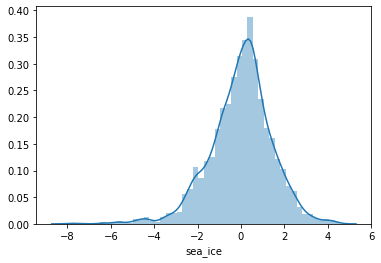

In [91]:
sns.distplot(y_test-predictions_dt_at)


In [404]:
from sklearn import metrics
dt_at_mae=metrics.mean_absolute_error(y_test, predictions_dt_at)
dt_at_mse=metrics.mean_squared_error(y_test, predictions_dt_at)
dt_at_rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions_dt_at))

In [405]:
#metrics used for decision tree regressor after hyper parameter tuning (grid search CV)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dt_at))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dt_at))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dt_at)))

MAE: 1.079989256411309
MSE: 2.060793424096537
RMSE: 1.4355463852124517


# Regression Evaluation Metrics¶
Here are three common evaluation metrics for regression problems:

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [402]:
dt_bt_mae=metrics.mean_absolute_error(y_test, prediction_dt_bt)
dt_bt_mse=metrics.mean_squared_error(y_test, prediction_dt_bt)
dt_bt_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction_dt_bt))

In [403]:
#metrics used for random forest regressor before hyper parameter tuning
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_dt_bt))
print('MSE:', metrics.mean_squared_error(y_test, prediction_dt_bt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_dt_bt)))

MAE: 0.5670203556387459
MSE: 0.6776911930276087
RMSE: 0.8232200149580966


# K Nearest Neighbor Regressor


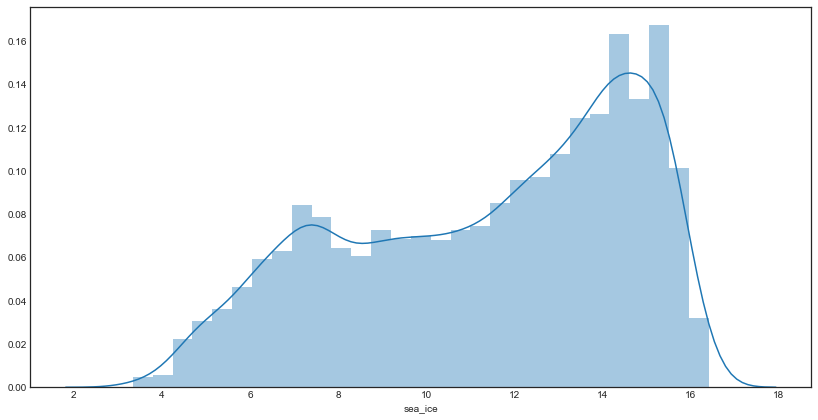

In [365]:
sns.distplot(y)

In [366]:
#Train Test split for knn along with libraries import
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [367]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 1.0


In [368]:
# r squared value calculation 
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))
r2_knn=regressor.score(X_test, y_test)

Coefficient of determination R^2 <-- on test set: 0.644300967241922


In [229]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

# mean value calculation
score.mean()

0.6004183968847512

#Model evaluation


In [299]:
prediction_kn_bt=regressor.predict(X_test)

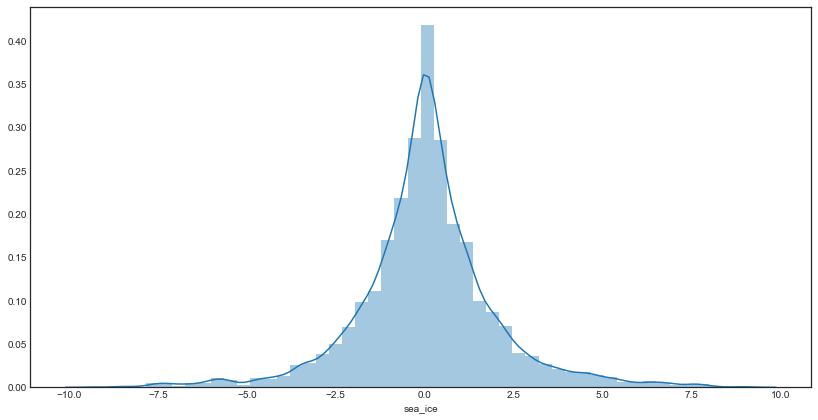

In [232]:
sns.distplot(y_test-prediction_kn_bt)

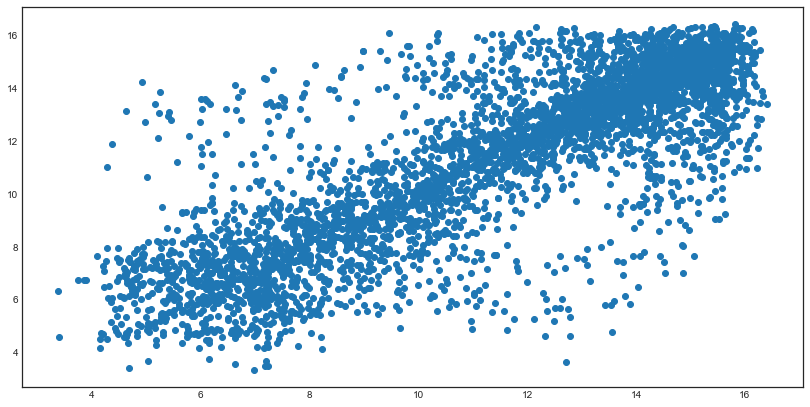

In [233]:
plt.scatter(y_test,prediction_kn_bt)

# Hyper parameter tuning

In [234]:

accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

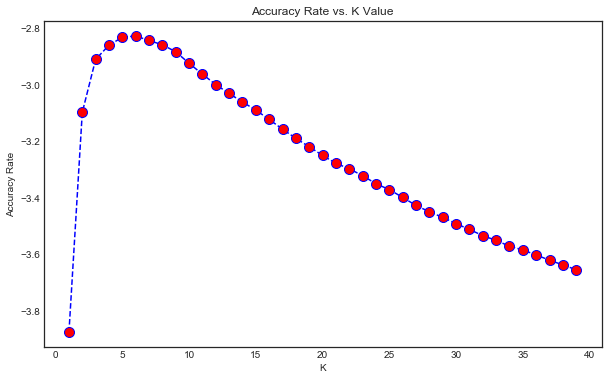

In [235]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

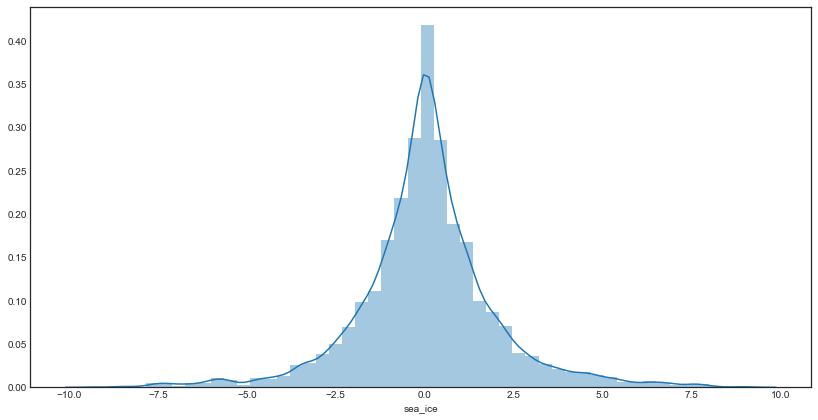

In [236]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions_kn_at1 = knn.predict(X_test)
sns.distplot(y_test-predictions_kn_at1)

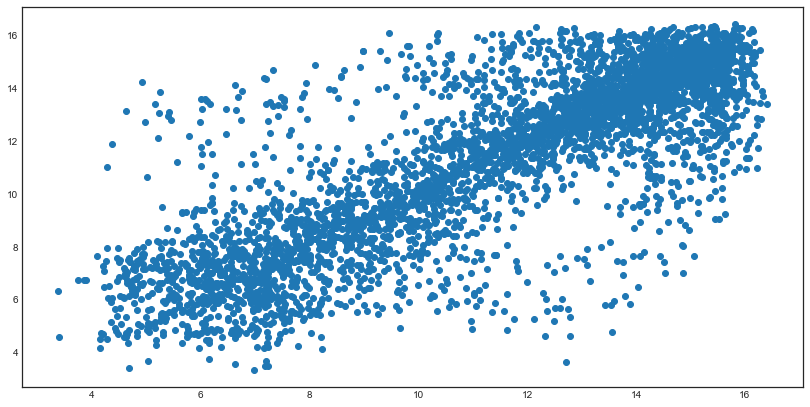

In [237]:
plt.scatter(y_test,predictions_kn_at1)


In [238]:
#metrics used for knn (k=1) after hyper parameter tuning (grid search CV)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_kn_at1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_kn_at1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_kn_at1)))

MAE: 1.3359468881609735
MSE: 3.8440779609265325
RMSE: 1.9606320309855525


In [239]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train,y_train)
predictions_kn_at5 = knn.predict(X_test)

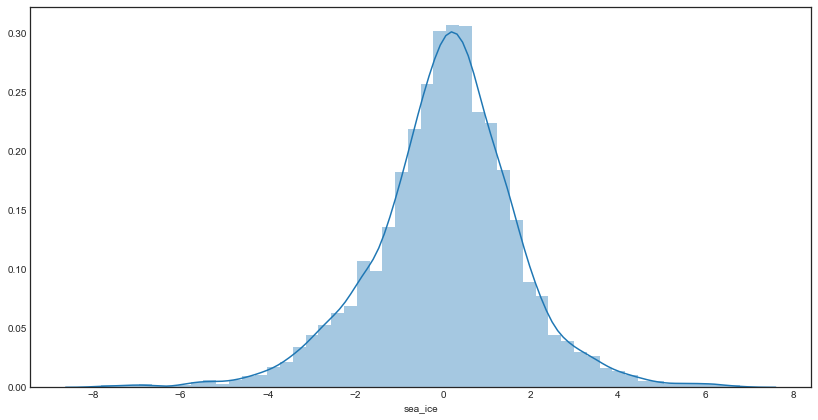

In [240]:
sns.distplot(y_test-predictions_kn_at5)


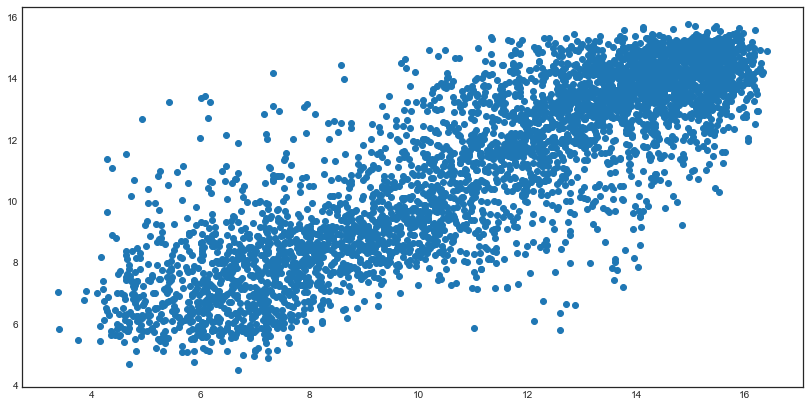

In [241]:
plt.scatter(y_test,predictions_kn_at5)

In [408]:
#metrics used for knn (k=5) after hyper parameter tuning (grid search CV)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_kn_at5))
print('MSE:', metrics.mean_squared_error(y_test, predictions_kn_at5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_kn_at5)))

MAE: 1.2395580720636405
MSE: 2.7744807466916237
RMSE: 1.6656772636653308


In [409]:
knn_at_mae=metrics.mean_absolute_error(y_test, predictions_kn_at5)
knn_at_mse=metrics.mean_squared_error(y_test, predictions_kn_at5)
knn_at_rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions_kn_at5))

# Regression Evaluation Metrics


In [406]:
#metrics used for knn before hyper parameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_kn_bt))
print('MSE:', metrics.mean_squared_error(y_test, prediction_kn_bt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_kn_bt)))

MAE: 1.3359468881609735
MSE: 3.8440779609265325
RMSE: 1.9606320309855525


In [407]:
knn_bt_mae=metrics.mean_absolute_error(y_test, prediction_kn_bt)
knn_bt_mse=metrics.mean_squared_error(y_test, prediction_kn_bt)
knn_bt_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction_kn_bt))

In [387]:
#knn = KNeighborsRegressor(n_neighbors=5)
#predictions_kn_at5 = knn.predict(X_test)
#knn.fit(X_train,y_train)
#predictions_kn_at5 = knn.predict(X_test)



In [386]:
#from sklearn.metrics import accuracy_score
#result2 = accuracy_score(y_test,predictions_kn_at5)
#print("Accuracy:",result2)

# Linear Regression

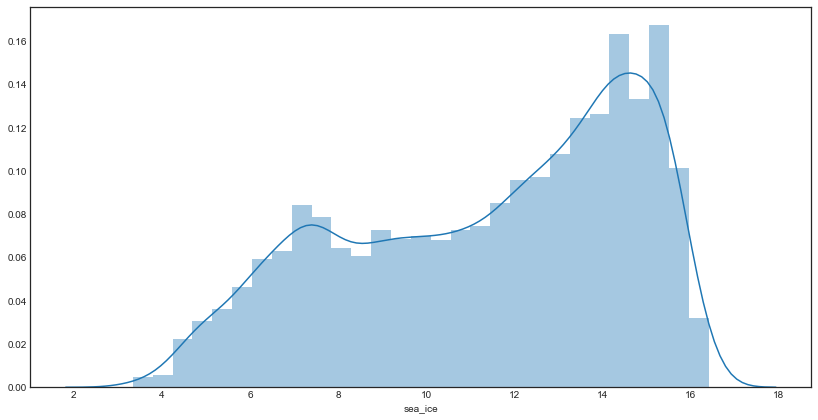

In [303]:
sns.distplot(y)

In [370]:
#Train Test split and import of libraries for linear regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [371]:
regressor.coef_

array([-2.16682288e-01,  5.97559529e-01,  4.93395919e-02, -1.81614360e-03,
       -2.22167120e+01,  2.24626046e-02,  1.47865114e-01,  3.42423976e-02,
       -3.46858823e-01,  7.67321832e-01, -4.51916918e+00])

In [372]:
regressor.intercept_

89.51255206814668

In [373]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.928716304894767


In [374]:
# R squared value calculation
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))
r2_linear=regressor.score(X_test, y_test)


Coefficient of determination R^2 <-- on test set: 0.9307164592685291


In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

#mean value calculation
score.mean()


0.9165343871695182

Model Evaluation


In [123]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

#Interpreting the coefficients:
#Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5 .
#Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5 

Coefficient
u10        -0.216682
v10         0.597560
cc          0.049340
msl        -0.001816
precip    -22.216712
GH_mean     0.022463
RH_mean     0.147865
cw          0.034242
hf         -0.346859
sw          0.767322
lw         -4.519169

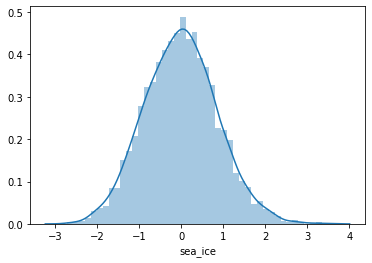

In [124]:
prediction_lr_bt=regressor.predict(X_test)
sns.distplot(y_test-prediction_lr_bt)

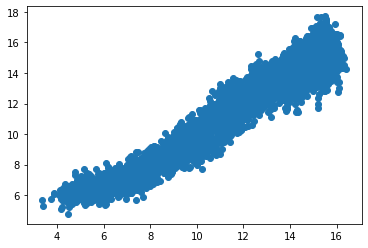

In [125]:
plt.scatter(y_test,prediction_lr_bt)

In [411]:
#metrics used for linear regression before hyper parameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lr_bt))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lr_bt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lr_bt)))

MAE: 0.688493210368401
MSE: 0.748754726476706
RMSE: 0.8653061460990012


In [410]:
linr_bt_mae=metrics.mean_absolute_error(y_test, prediction_lr_bt)
linr_bt_mse=metrics.mean_squared_error(y_test, prediction_lr_bt)
linr_bt_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction_lr_bt))

In [128]:
#linear regression doesn’t have any hyperparameters. But variants of linear regression do. 
#Ridge regression and lasso both add a regularization term to linear regression;
#the weight for the regularization term is called the regularization parameter

In [388]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

# Comparison Linear, Ridge and Lasso Regression¶


# Linear Regression

In [311]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [312]:
# Linear Regression mean calculation
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.8338724203983283


# Ridge Regression

In [131]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [132]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [134]:
#Mean calculation for ridge regressor
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.8338724203983168


In [135]:
prediction1_rr_at=ridge_regressor.predict(X_test)


In [412]:
ridr_at_mae=metrics.mean_absolute_error(y_test, prediction1_rr_at)
ridr_at_mse=metrics.mean_squared_error(y_test, prediction1_rr_at)
ridr_at_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction1_rr_at))

In [413]:
#metrics used for Ridge Regressor after hyper parameter tuning (grid search CV)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction1_rr_at))
print('MSE:', metrics.mean_squared_error(y_test, prediction1_rr_at))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1_rr_at)))

MAE: 0.6881522227216185
MSE: 0.7476467013498901
RMSE: 0.8646656587085496


# Lasso Regression

In [317]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [318]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)


# mean calculation below for lasso regressor
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3994.784085852522, tolerance: 12.255261257895997
  positive)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4216.528219142456, tolerance: 12.436022775138575
  positive)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4391.6438407976475, tolerance: 12.32037423761804
  positive)
C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

{'alpha': 1e-15}
-0.8338740022186446


C:\Users\14438\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5323.415198007375, tolerance: 15.070228466387466
  positive)


Model Evaluation

In [142]:
prediction_lsr_at=lasso_regressor.predict(X_test)


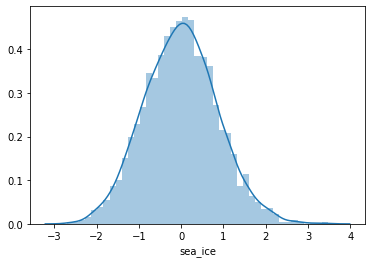

In [143]:
sns.distplot(y_test-prediction_lsr_at)


# Regression evaluation metrics


In [414]:
#metrics used for calculation for lasso regressor after hyper parameter tuning (grid search CV)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lsr_at))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lsr_at))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lsr_at)))

MAE: 0.6881521909784925
MSE: 0.7476469684713781
RMSE: 0.8646658131737245


In [415]:
lassr_at_mae=metrics.mean_absolute_error(y_test, prediction_lsr_at)
lassr_at_mse=metrics.mean_squared_error(y_test, prediction_lsr_at)
lassr_at_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction_lsr_at))

# XG Boost Regressor

In [389]:
# Train test split and libraries import for XG Boost Regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [390]:
import xgboost as xgb
#pip install xgboost

In [391]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [393]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9896028635323041


C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [395]:
# R squared value for XG Boost Regressor
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))
r2_xgboost=regressor.score(X_test, y_test)

Coefficient of determination R^2 <-- on test set: 0.9664457442020212


C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [381]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "bec

In [329]:
# mean calculation for XG Boost Regressor
score.mean()

0.9429543299337718

# Model evaluation

In [382]:
prediction_xgb_bt=regressor.predict(X_test)

C:\Users\14438\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


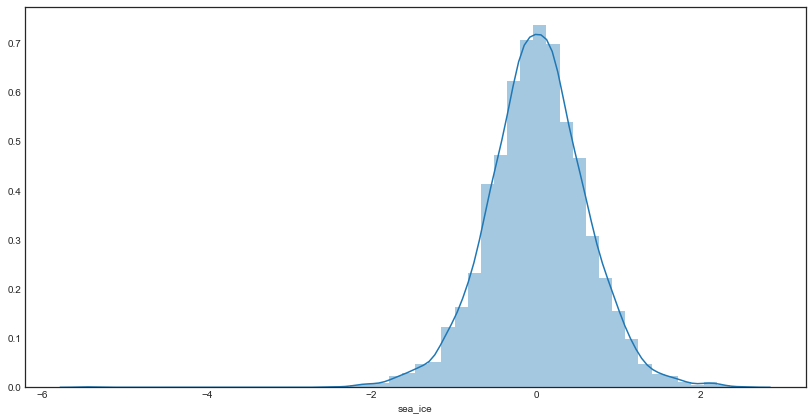

In [331]:
sns.distplot(y_test-prediction_xgb_bt)

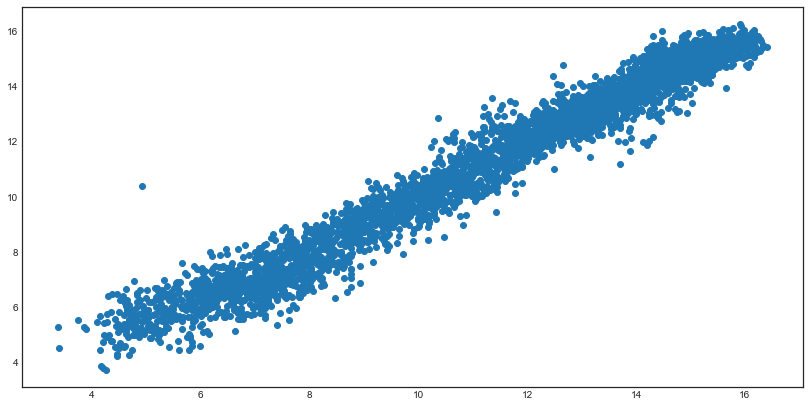

In [332]:
plt.scatter(y_test,prediction_xgb_bt)

# Hyperparameter Tuning

In [343]:
xgb1=xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [334]:
from sklearn.model_selection import GridSearchCV

In [165]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [335]:
xgb_grid.fit(X_train,y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   29.7s finished


[00:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9644022179053453
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [336]:
predictions_xgb_at=xgb_grid.predict(X_test)

In [416]:
#metrics used for calculation for XG Boost Regressor after hyper parameter tuning (grid search CV)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_xgb_at))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xgb_at))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb_at)))

MAE: 0.45144071224330456
MSE: 0.3372958175649513
RMSE: 0.5807717430841064


In [417]:
xgb_at_mae=metrics.mean_absolute_error(y_test, predictions_xgb_at)
xgb_at_mse=metrics.mean_squared_error(y_test, predictions_xgb_at)
xgb_at_rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb_at))

In [418]:
xgb_bt_mae=metrics.mean_absolute_error(y_test, prediction_xgb_bt)
xgb_bt_mse=metrics.mean_squared_error(y_test, prediction_xgb_bt)
xgb_bt_rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction_xgb_bt))

In [419]:
#metrics used for calculation for XG Boost Regressorr before hyper parameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_xgb_bt))
print('MSE:', metrics.mean_squared_error(y_test, prediction_xgb_bt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_xgb_bt)))

MAE: 0.4616742036089364
MSE: 0.3626244755521401
RMSE: 0.6021830913867809


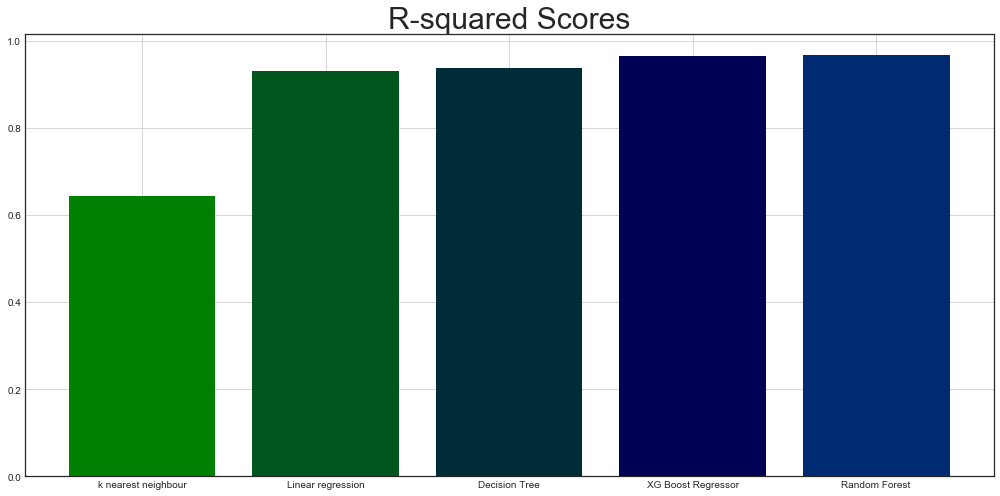

In [426]:
#Comparative analysis(R-squared scores) of plots obtained for different regression methods
r2_scores_regression = np.array([r2_randomforest,r2_decisiontree,r2_knn,r2_linear,r2_xgboost])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Linear regression', 'XG Boost Regressor'])
indices = np.argsort(r2_scores_regression)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), r2_scores_regression[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R-squared Scores', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

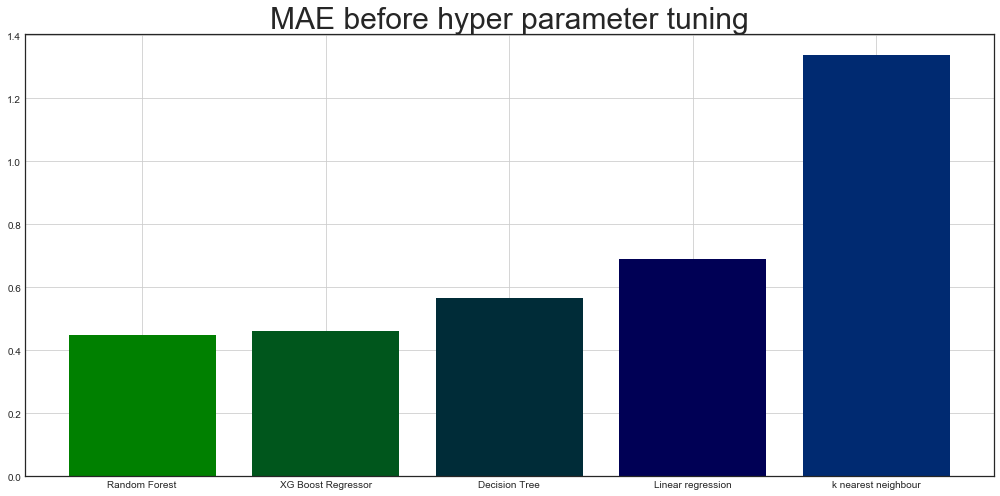

In [427]:


#Comparative analysis(MAE scores) of plots obtained for different regression methods before hyper parameter tuning
mae_bt = np.array([rf_bt_mae,dt_bt_mae,knn_bt_mae,linr_bt_mae,xgb_bt_mae])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Linear regression', 'XG Boost Regressor'])
indices = np.argsort(mae_bt)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), mae_bt[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('MAE before hyper parameter tuning', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

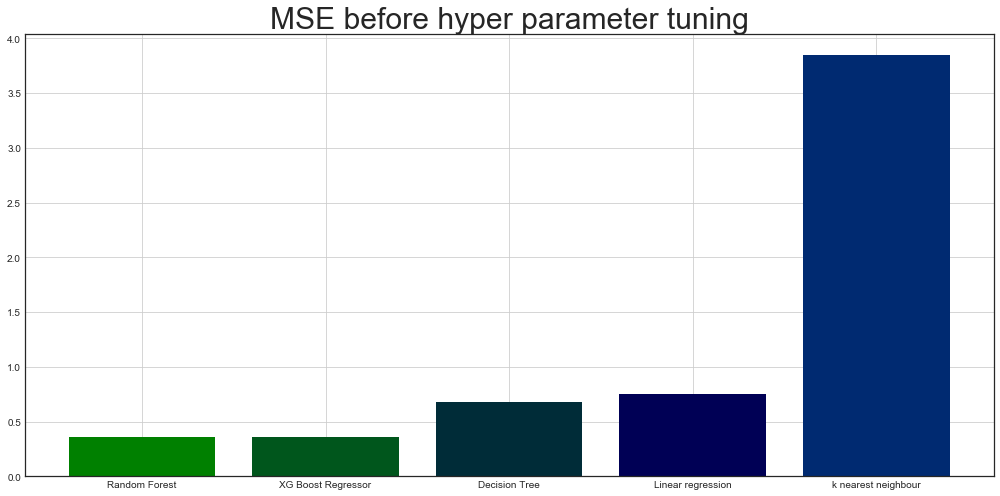

In [429]:



#Comparative analysis(MSE scores) of plots obtained for different regression methods before hyper parameter tuning
mse_bt = np.array([rf_bt_mse,dt_bt_mse,knn_bt_mse,linr_bt_mse,xgb_bt_mse])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Linear regression', 'XG Boost Regressor'])
indices = np.argsort(mse_bt)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), mse_bt[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('MSE before hyper parameter tuning', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

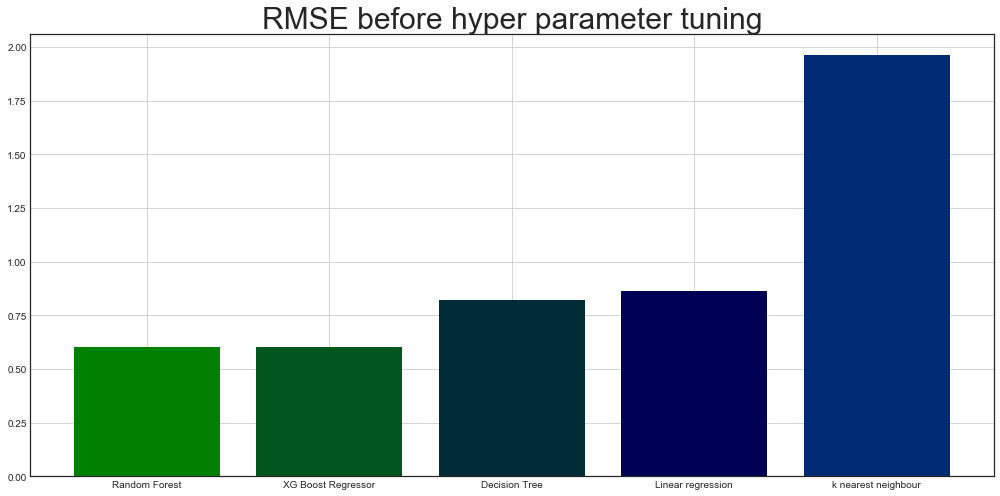

In [431]:
#Comparative analysis(RMSE scores) of plots obtained for different regression methods before hyper parameter tuning
rmse_bt = np.array([rf_bt_rmse,dt_bt_rmse,knn_bt_rmse,linr_bt_rmse,xgb_bt_rmse])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Linear regression', 'XG Boost Regressor'])
indices = np.argsort(rmse_bt)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), rmse_bt[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('RMSE before hyper parameter tuning', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

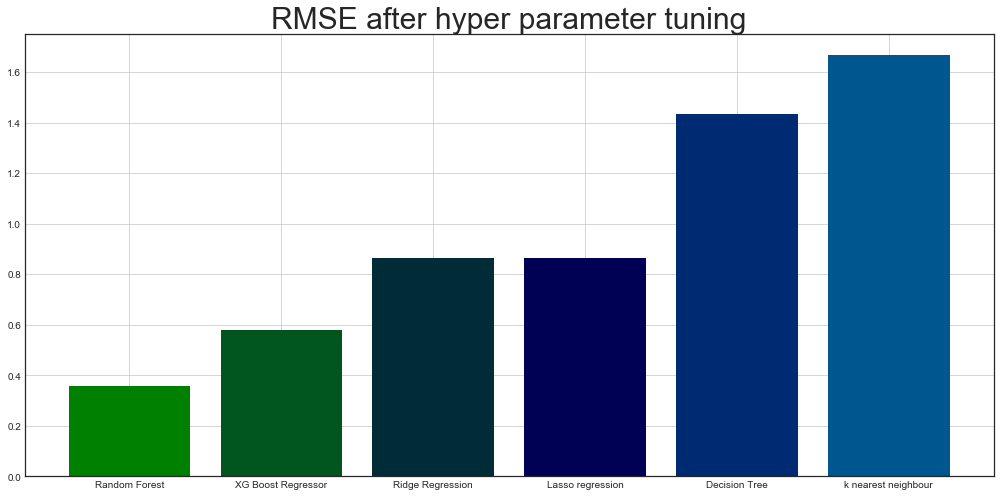

In [432]:
#Comparative analysis(RMSE scores) of plots obtained for different regression methods after hyper parameter tuning
rmse_at = np.array([rf_atgcv_rmse,dt_at_rmse,knn_at_rmse,lassr_at_rmse,ridr_at_rmse,xgb_at_rmse])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Lasso regression', 'Ridge Regression','XG Boost Regressor'])
indices = np.argsort(rmse_at)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), rmse_at[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('RMSE after hyper parameter tuning', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

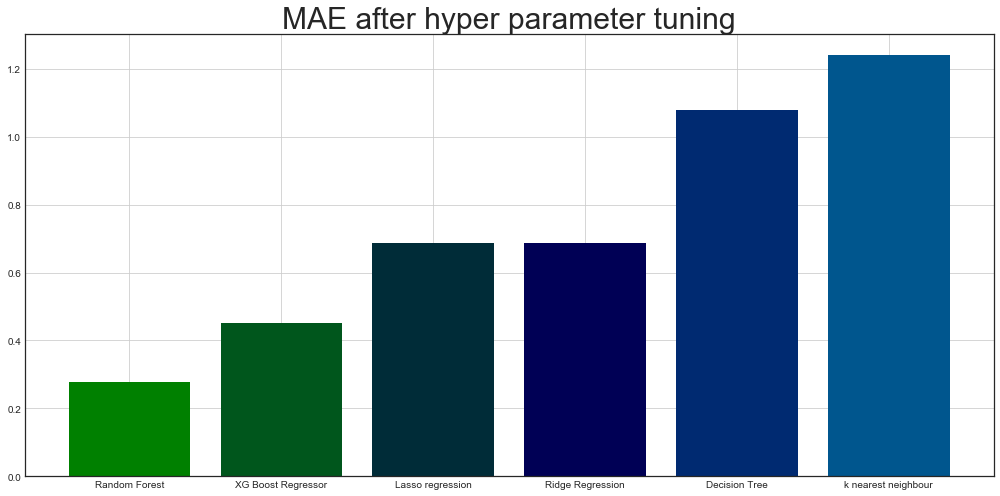

In [434]:
#Comparative analysis(MAE scores) of plots obtained for different regression methods after hyper parameter tuning
mae_at = np.array([rf_atgcv_mae,dt_at_mae,knn_at_mae,lassr_at_mae,ridr_at_mae,xgb_at_mae])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Lasso regression', 'Ridge Regression','XG Boost Regressor'])
indices = np.argsort(mae_at)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), mae_at[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('MAE after hyper parameter tuning', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

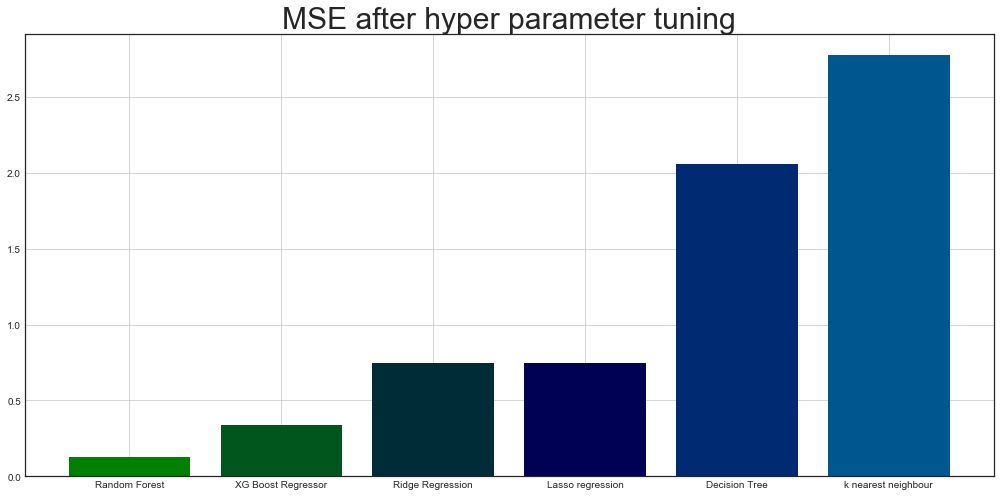

In [436]:
 #Comparative analysis(MSE scores) of plots obtained for different regression methods after hyper parameter tuning
mse_at = np.array([rf_atgcv_mse,dt_at_mse,knn_at_mse,lassr_at_mse,ridr_at_mse,xgb_at_mse])
labels = np.array(['Random Forest', 'Decision Tree','k nearest neighbour','Lasso regression', 'Ridge Regression','XG Boost Regressor'])
indices = np.argsort(mse_at)
color = plt.cm.ocean(np.linspace(0, 1, 10))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), mse_at[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('MSE after hyper parameter tuning', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()